<a href="https://colab.research.google.com/github/himanshigarg01/deep-learning/blob/main/Basic_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install tensorflow==2.12.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 124.5 MB/s eta 0:00:00

In [70]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
# Seperating X and y
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]
print(X.head())
print(y)

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [74]:
# ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
# Assume X is your original DataFrame
categorical_cols = ['Geography', 'Gender']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encode categorical columns
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = ohe.fit_transform(X[categorical_cols])

# Convert the encoded output to a DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(categorical_cols), index=X.index)

# Concatenate with the numeric columns
X_final = pd.concat([X[numeric_cols], encoded_df], axis=1)

In [75]:
print(X_final.head(5))

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               1        101348.88                0.0              0.0   
1               1        112542.58                0.0              1.0   
2               0        113931.57                0.0              0.0   
3               0         93826.63                0.0              0.0   
4               1         79084.10                0.0              1.0   

   Gender_Male  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


In [76]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state=0)

In [77]:
# Scaling
from sklearn.preprocessing import StandardScaler
std_sclr = StandardScaler()
X_train = std_sclr.fit_transform(X_train)
X_test = std_sclr.transform(X_test)
print(X_train)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]


In [78]:
X_train.shape

(8000, 11)

ANN IMPLEMENTATION

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [80]:
#initialise ANN
clsfr = Sequential()

In [81]:
# Adding input layer
clsfr.add(Dense(units=11, activation='relu'))

In [82]:
# Hidden layer 1
clsfr.add(Dense(units=7, activation='relu'))
# clsfr.add(Dropout(0.2)) #adding dropout layer

In [83]:
# Hidden layer 2
clsfr.add(Dense(units=6, activation='relu'))

In [84]:
# Output layer
clsfr.add(Dense(units=1, activation='sigmoid'))

In [85]:
# Usual compilation
clsfr.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #adam has default learning rate 0.1

In [86]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [87]:
# Compilation if customised learning rate is required
clsfr.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
# Early Stopping (when accuracy is not increasing then the model will stop)
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [89]:
# Train the Neural Network
model_history =  clsfr.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7909 - loss: 0.4939 - val_accuracy: 0.8095 - val_loss: 0.4259
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8175 - loss: 0.3966 - val_accuracy: 0.8338 - val_loss: 0.3743
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.3712 - val_accuracy: 0.8497 - val_loss: 0.3655
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8504 - loss: 0.3570 - val_accuracy: 0.8478 - val_loss: 0.3790
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8580 - loss: 0.3469 - val_accuracy: 0.8519 - val_loss: 0.3637
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8633 - loss: 0.3360 - val_accuracy: 0.8463 - val_loss: 0.3699
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8666 - loss: 0.3253 - val_accuracy: 0.8474 - val_loss: 0.3807
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8627 - loss: 0.3362 - 

In [90]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

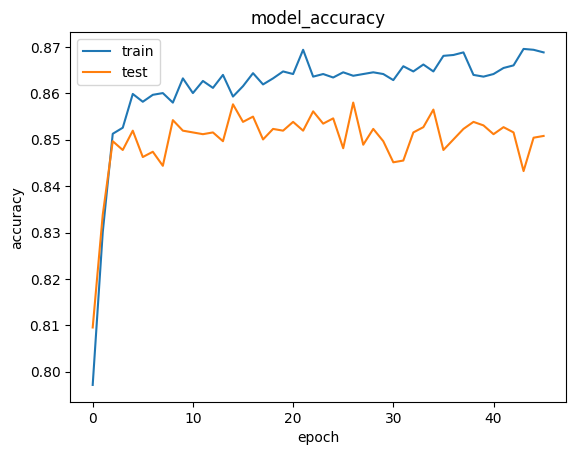

In [91]:
# summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

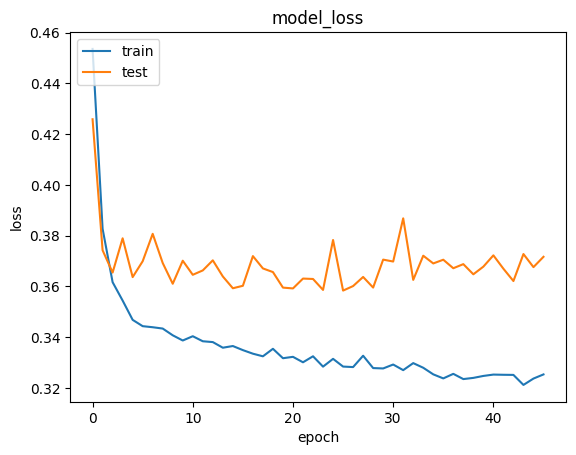

In [92]:
# summarize the history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
# Prediction
y_pred = clsfr.predict(X_test)
print(y_pred)
y_pred = (y_pred >= 0.5)
print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0.27360797]
 [0.13262713]
 [0.09710977]
 ...
 [0.06616301]
 [0.10461289]
 [0.28490615]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [94]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1538,   57],
       [ 230,  175]])

In [95]:
# Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score


0.8565

In [96]:
# Weights
clsfr.get_weights() #Arrays define for different layers

[array([[ 0.85407805, -0.4340263 ,  0.34496203, -0.1839426 ,  0.18203299,
          0.33785796,  0.62801415,  2.1621997 , -0.5086748 , -0.24574028,
          0.6380592 ],
        [-1.4128737 ,  2.8379958 , -3.1052504 ,  1.3227996 , -0.9080155 ,
         -3.3540719 , -0.592659  ,  1.0491213 , -0.70992166,  0.63922334,
         -0.33681616],
        [-0.22214127,  0.11859404,  0.44076276,  0.36060035,  0.8264881 ,
         -0.8449526 ,  1.4418206 ,  1.9242872 , -0.67398036,  0.16969828,
         -2.5590107 ],
        [-0.03249419, -1.0586159 ,  0.19475605, -1.0840235 , -1.9737031 ,
         -1.51977   , -2.220987  ,  0.3045893 , -2.5371604 ,  0.4414695 ,
          1.3828958 ],
        [ 1.4472269 , -0.5566428 , -0.30864462, -3.1045895 ,  3.2517037 ,
         -0.32885438, -0.7337288 ,  1.0181092 , -1.7621121 ,  3.4232492 ,
         -1.0956936 ],
        [ 2.792517  ,  0.35810697,  0.2899979 ,  0.13465188, -0.10644563,
         -0.80619407, -1.1120026 ,  0.6848529 ,  0.65943885, -0.3420317